In [ ]:
! pip install pillow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
colored_image = "/content/drive/MyDrive/AI/Lenna_(test_image).png"

## 2.1 Exercise - 1:
Complete all the Task.
### 1. Read and display the image.

• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.


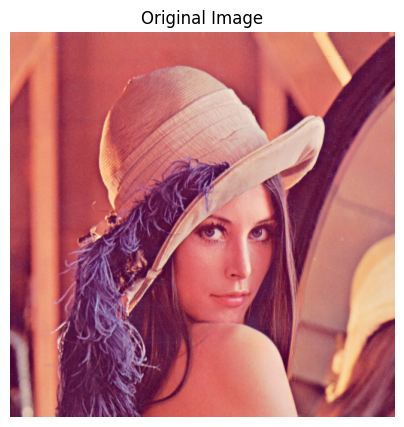

In [ ]:
image = Image.open(colored_image)

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

image_array = np.array(image)

### 2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

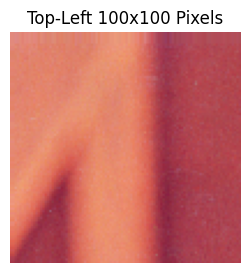

In [ ]:
top_left_corner = image_array[:100, :100]  # Extract top-left 100x100 pixels

plt.figure(figsize=(3, 3))
plt.imshow(top_left_corner)
plt.title("Top-Left 100x100 Pixels")
plt.axis("off")
plt.show()

### 3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

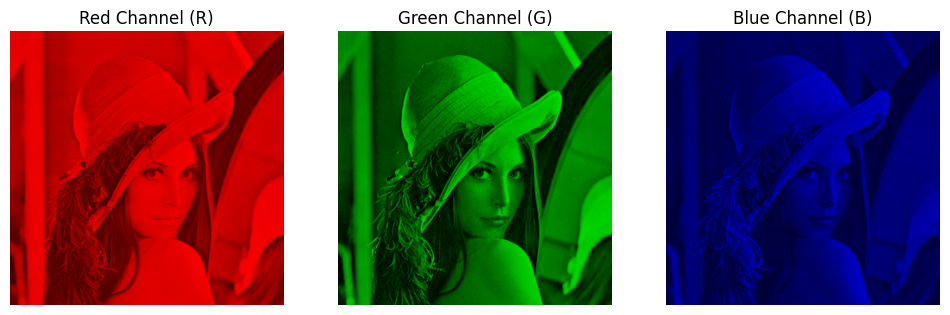

In [ ]:
r_channel = image_array.copy()
g_channel = image_array.copy()
b_channel = image_array.copy()

r_channel[:, :, 1:] = 0  # Keep only Red, set Green & Blue to 0
g_channel[:, :, [0, 2]] = 0  # Keep only Green
b_channel[:, :, :2] = 0  # Keep only Blue

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(r_channel)
ax[0].set_title("Red Channel (R)")
ax[0].axis("off")

ax[1].imshow(g_channel)
ax[1].set_title("Green Channel (G)")
ax[1].axis("off")

ax[2].imshow(b_channel)
ax[2].set_title("Blue Channel (B)")
ax[2].axis("off")

plt.show()

### 4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a light gray color), and then display the modified image

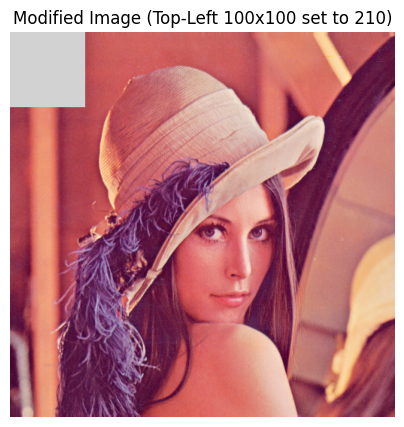

In [ ]:
modified_image = image_array.copy()
modified_image[:100, :100] = 210  # Set top-left 100x100 pixels to light gray

plt.figure(figsize=(5, 5))
plt.imshow(modified_image)
plt.title("Modified Image (Top-Left 100x100 set to 210)")
plt.axis("off")
plt.show()

## 2.2 Exercise - 2:
Complete all the Task.
### 1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.




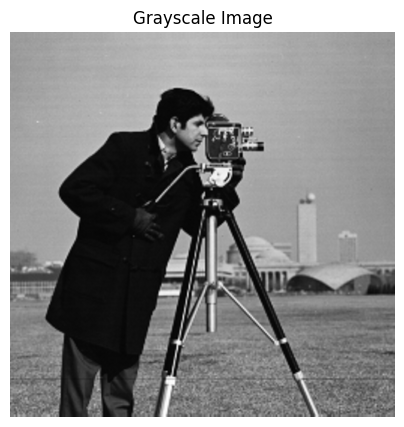

In [ ]:
cameramanimage_path = "/content/drive/MyDrive/AI/cameraman.png"

image = Image.open(cameramanimage_path).convert("L")  # Convert to grayscale

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Convert the grayscale image to a NumPy array
image_array = np.array(image)

### 2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing. • Display this cropped image using matplotlib.

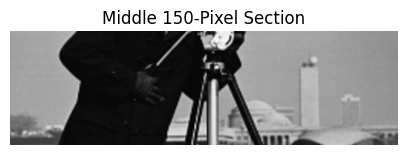

In [ ]:
height, width = image_array.shape
middle_start = height // 2 - 75  # Start 75 pixels before center
middle_end = middle_start + 150  # End 150 pixels after start

middle_section = image_array[middle_start:middle_end, :]

plt.figure(figsize=(5, 3))
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150-Pixel Section")
plt.axis("off")
plt.show()

### 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values above 100 to 255 (creating a binary image). • Display the resulting binary image.

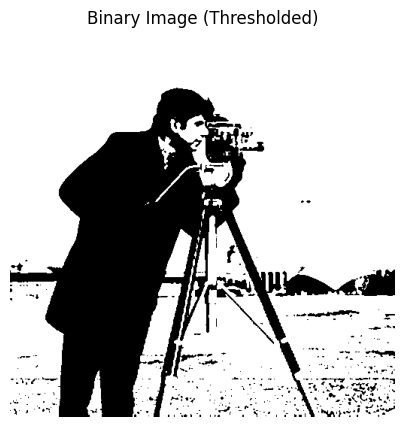

In [ ]:
threshold = 100
binary_image = np.where(image_array < threshold, 0, 255).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Thresholded)")
plt.axis("off")
plt.show()

### 4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating the image array. • Display the rotated image using matplotlib.

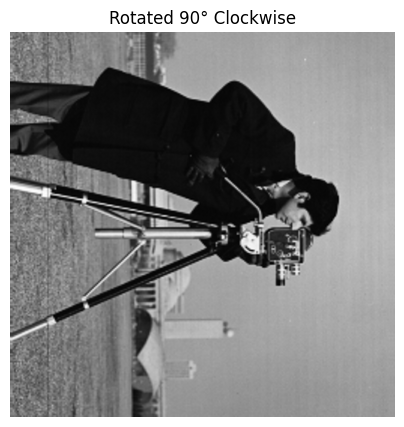

In [ ]:
rotated_image = np.rot90(image_array, k=3)  # Rotate 90° clockwise (k=3 means 3 * 90° counterclockwise)

plt.figure(figsize=(5, 5))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated 90° Clockwise")
plt.axis("off")
plt.show()

### 5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B). • Display the converted RGB image using matplotlib.

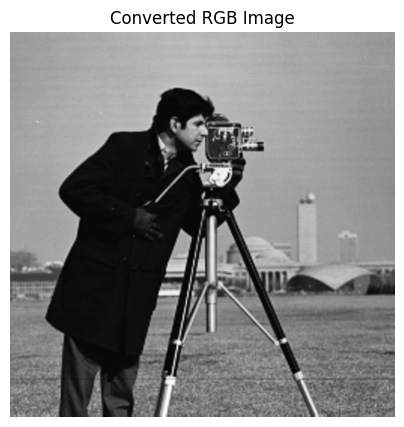

In [ ]:
rgb_image = np.stack([image_array] * 3, axis=-1)  # Replicate grayscale values for R, G, and B

plt.figure(figsize=(5, 5))
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()

## 3. Image Compression and Decompression using PCA.
In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.

### 1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

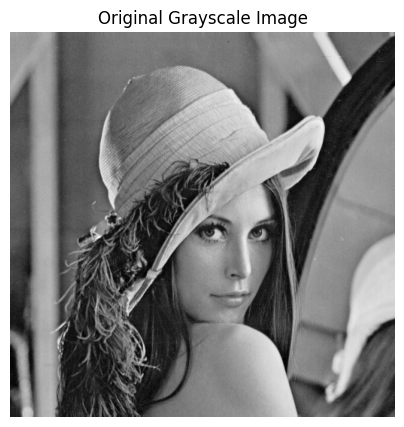

Mean Pixel Values (first 5 values): [94.81445312 94.79882812 95.33789062 95.2578125  95.41015625]
Standardized Data (first 5 pixels): [[67.18554688 67.20117188 66.66210938 65.7421875  66.58984375]
 [67.18554688 67.20117188 66.66210938 65.7421875  66.58984375]
 [67.18554688 67.20117188 66.66210938 65.7421875  66.58984375]
 [67.18554688 67.20117188 66.66210938 65.7421875  66.58984375]
 [67.18554688 67.20117188 66.66210938 65.7421875  66.58984375]]
Covariance Matrix (first 5x5 block):
 [[1546.39407641 1547.00173908 1504.58140824 1477.05184381 1452.23280791]
 [1547.00173908 1547.73440176 1505.3538214  1477.83865888 1453.03766359]
 [1504.58140824 1505.3538214  1487.52357128 1461.73463491 1442.29362616]
 [1477.05184381 1477.83865888 1461.73463491 1458.90013454 1440.39894203]
 [1452.23280791 1453.03766359 1442.29362616 1440.39894203 1445.16216671]]


In [ ]:
lena_path="/content/drive/MyDrive/AI/lena_gray.png"

image = Image.open(lena_path).convert("L")  # Convert to grayscale
image_array = np.array(image, dtype=np.float64)  # Convert to float for PCA processing

# Display the original grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(image_array, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

# Standardize the Data (Centering)
mean_pixel = np.mean(image_array, axis=0)
standardized_data = image_array - mean_pixel

# Calculate Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Print values for debugging
print("Mean Pixel Values (first 5 values):", mean_pixel[:5])  # Print first 5 mean values
print("Standardized Data (first 5 pixels):", standardized_data[:5, :5])  # Print a 5x5 sample
print("Covariance Matrix (first 5x5 block):\n", cov_matrix[:5, :5])  # Print a small part of the covariance matrix


### 2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.

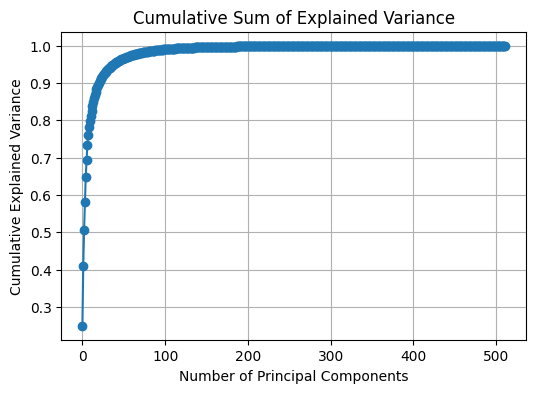

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Compute eigenvalues & eigenvectors

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Compute the cumulative sum of explained variance
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the Cumulative Sum to determine k components
plt.figure(figsize=(6, 4))
plt.plot(cumulative_variance, marker="o", linestyle="-")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Sum of Explained Variance")
plt.grid()
plt.show()

### 3. Reconstruction and Experiment:
• Reconstruction: Transform the original data by multiplying it with the selected eigenvec- tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex- plained variance value and compare the result.

• Display the Results and Evaluate.

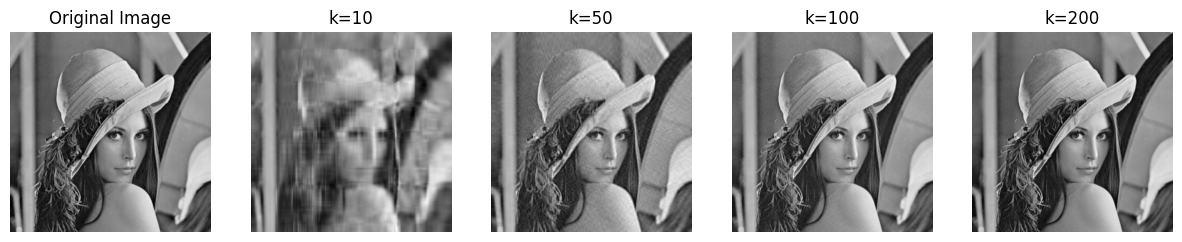

In [ ]:
def reconstruct_image(k):
    """ Reconstruct image using k principal components """
    top_k_eigenvectors = sorted_eigenvectors[:, :k]  # Select top k eigenvectors
    compressed_data = np.dot(standardized_data, top_k_eigenvectors)  # Project to lower dimension
    reconstructed = np.dot(compressed_data, top_k_eigenvectors.T) + mean_pixel  # Reconstruct image
    return np.clip(reconstructed, 0, 255)  # Ensure valid pixel values

# Experiment with 4 different k values
k_values = [10, 50, 100, 200]  # Different number of principal components

fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))

# Show original image
axes[0].imshow(image_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show reconstructed images for different k values
for i, k in enumerate(k_values):
    reconstructed_img = reconstruct_image(k)
    axes[i + 1].imshow(reconstructed_img, cmap="gray")
    axes[i + 1].set_title(f"k={k}")
    axes[i + 1].axis("off")

plt.show()
